In [ ]:
# importing libraries

import requests
import pandas as pd
from pandas import json_normalize
import json
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# API key to import Pokemon names

url = "https://pokemon-go1.p.rapidapi.com/pokemon_names.json"

headers = {
	"X-RapidAPI-Key": "fdb593c968mshdfcf01d12f99976p14620ajsn75d2b69a2482",
	"X-RapidAPI-Host": "pokemon-go1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

names = response.text

In [ ]:
# covert the json format into pandas dataframe
df_names = pd.read_json(names, orient='rows')

In [ ]:
# Transposing the dataframe to right dimentions
df_names = df_names.T

In [ ]:
df_names.head(5)

,id,name
1,1,Bulbasaur
10,10,Caterpie
100,100,Voltorb
1000,1000,Gholdengo
1001,1001,Wo-Chien


In [ ]:
# importing pokemon moves data using API

url = "https://pokemon-go1.p.rapidapi.com/current_pokemon_moves.json"

headers = {
	"X-RapidAPI-Key": "fdb593c968mshdfcf01d12f99976p14620ajsn75d2b69a2482",
	"X-RapidAPI-Host": "pokemon-go1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

moves = response.text

In [ ]:
#Converting json format into pandas dataframe
df_moves = pd.read_json(moves, orient='rows')

In [ ]:
# using the only the normal form
df_moves = df_moves[(df_moves.form == 'Normal')]
df_moves.rename(columns={'pokemon_id': 'id'}, inplace=True)

In [ ]:
df_moves

,charged_moves,elite_charged_moves,elite_fast_moves,fast_moves,form,id,pokemon_name
1,"[Sludge Bomb, Seed Bomb, Power Whip]",[],[],"[Vine Whip, Tackle]",Normal,1,Bulbasaur
2,"[Sludge Bomb, Solar Beam, Power Whip]",[],[],"[Razor Leaf, Vine Whip]",Normal,2,Ivysaur
4,"[Sludge Bomb, Petal Blizzard, Solar Beam]",[Frenzy Plant],[],"[Razor Leaf, Vine Whip]",Normal,3,Venusaur
6,"[Flame Charge, Flame Burst, Flamethrower]",[],[],"[Ember, Scratch]",Normal,4,Charmander
7,"[Fire Punch, Flame Burst, Flamethrower]",[],[Scratch],"[Ember, Fire Fang]",Normal,5,Charmeleon
...,...,...,...,...,...,...,...
1187,"[Fire Punch, Thunder Punch, Aerial Ace, Ice Pu...",[High Horsepower],[],"[Tackle, Rock Smash]",Normal,901,Ursaluna
1188,"[Aerial Ace, Close Combat, X Scissor]",[],[],"[Rock Smash, Poison Jab, Shadow Claw]",Normal,903,Sneasler
1189,"[Aqua Tail, Ice Beam, Sludge Bomb, Dark Pulse,...",[],[],"[Poison Sting, Poison Jab]",Normal,904,Overqwil
1190,[Shadow Ball],[],[],[Astonish],Normal,999,Gimmighoul


In [ ]:
# importing pokemon types data using API

url = "https://pokemon-go1.p.rapidapi.com/pokemon_types.json"

headers = {
	"X-RapidAPI-Key": "fdb593c968mshdfcf01d12f99976p14620ajsn75d2b69a2482",
	"X-RapidAPI-Host": "pokemon-go1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

types = response.text

In [ ]:
# Converting Json format into pandas dataframe
df_types = pd.read_json(types, orient='rows')

In [ ]:
# Using only the normal pokemon form
df_types = df_types[(df_types.form == 'Normal')]

In [ ]:
# renaming id pokemon id to id for joining
df_types.rename(columns={'pokemon_id': 'id'}, inplace=True)
df_types

,form,id,pokemon_name,type
1,Normal,1,Bulbasaur,"[Grass, Poison]"
2,Normal,2,Ivysaur,"[Grass, Poison]"
4,Normal,3,Venusaur,"[Grass, Poison]"
6,Normal,4,Charmander,[Fire]
7,Normal,5,Charmeleon,[Fire]
...,...,...,...,...
1187,Normal,901,Ursaluna,"[Ground, Normal]"
1188,Normal,903,Sneasler,"[Fighting, Poison]"
1189,Normal,904,Overqwil,"[Dark, Poison]"
1190,Normal,999,Gimmighoul,[Ghost]


In [ ]:
# merging moves and types dataframes
df4 = pd.merge(df_moves, df_types, on='id', how='inner')
df4


,charged_moves,elite_charged_moves,elite_fast_moves,fast_moves,form_x,id,pokemon_name_x,form_y,pokemon_name_y,type
0,"[Sludge Bomb, Seed Bomb, Power Whip]",[],[],"[Vine Whip, Tackle]",Normal,1,Bulbasaur,Normal,Bulbasaur,"[Grass, Poison]"
1,"[Sludge Bomb, Solar Beam, Power Whip]",[],[],"[Razor Leaf, Vine Whip]",Normal,2,Ivysaur,Normal,Ivysaur,"[Grass, Poison]"
2,"[Sludge Bomb, Petal Blizzard, Solar Beam]",[Frenzy Plant],[],"[Razor Leaf, Vine Whip]",Normal,3,Venusaur,Normal,Venusaur,"[Grass, Poison]"
3,"[Flame Charge, Flame Burst, Flamethrower]",[],[],"[Ember, Scratch]",Normal,4,Charmander,Normal,Charmander,[Fire]
4,"[Fire Punch, Flame Burst, Flamethrower]",[],[Scratch],"[Ember, Fire Fang]",Normal,5,Charmeleon,Normal,Charmeleon,[Fire]
...,...,...,...,...,...,...,...,...,...,...
853,"[Fire Punch, Thunder Punch, Aerial Ace, Ice Pu...",[High Horsepower],[],"[Tackle, Rock Smash]",Normal,901,Ursaluna,Normal,Ursaluna,"[Ground, Normal]"
854,"[Aerial Ace, Close Combat, X Scissor]",[],[],"[Rock Smash, Poison Jab, Shadow Claw]",Normal,903,Sneasler,Normal,Sneasler,"[Fighting, Poison]"
855,"[Aqua Tail, Ice Beam, Sludge Bomb, Dark Pulse,...",[],[],"[Poison Sting, Poison Jab]",Normal,904,Overqwil,Normal,Overqwil,"[Dark, Poison]"
856,[Shadow Ball],[],[],[Astonish],Normal,999,Gimmighoul,Normal,Gimmighoul,[Ghost]


In [ ]:
# Importing Pokemon Statistics API
url = "https://pokemon-go1.p.rapidapi.com/pokemon_stats.json"

headers = {
	"X-RapidAPI-Key": "fdb593c968mshdfcf01d12f99976p14620ajsn75d2b69a2482",
	"X-RapidAPI-Host": "pokemon-go1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

stats = response.text

In [ ]:
# reading json file and converting it into a pandas dataframe
df_stats = pd.read_json(stats, orient = 'Rows')

In [ ]:
# Filtering out Pokemons other than Normal
df_stats = df_stats[(df_stats.form=='Normal')]


In [ ]:
df_stats.head(5)

,base_attack,base_defense,base_stamina,form,pokemon_id,pokemon_name
1,118,111,128,Normal,1,Bulbasaur
2,151,143,155,Normal,2,Ivysaur
4,198,189,190,Normal,3,Venusaur
6,116,93,118,Normal,4,Charmander
7,158,126,151,Normal,5,Charmeleon


# Since the Types DataFarme have the types column which contain Uneven list type, We explode the type column


In [ ]:
# expoding the types column contating list values for better visualization
df_types_exploded = df_types.explode('type')

In [ ]:
df_types_exploded.head(5)

,form,id,pokemon_name,type
1,Normal,1,Bulbasaur,Grass
1,Normal,1,Bulbasaur,Poison
2,Normal,2,Ivysaur,Grass
2,Normal,2,Ivysaur,Poison
4,Normal,3,Venusaur,Grass


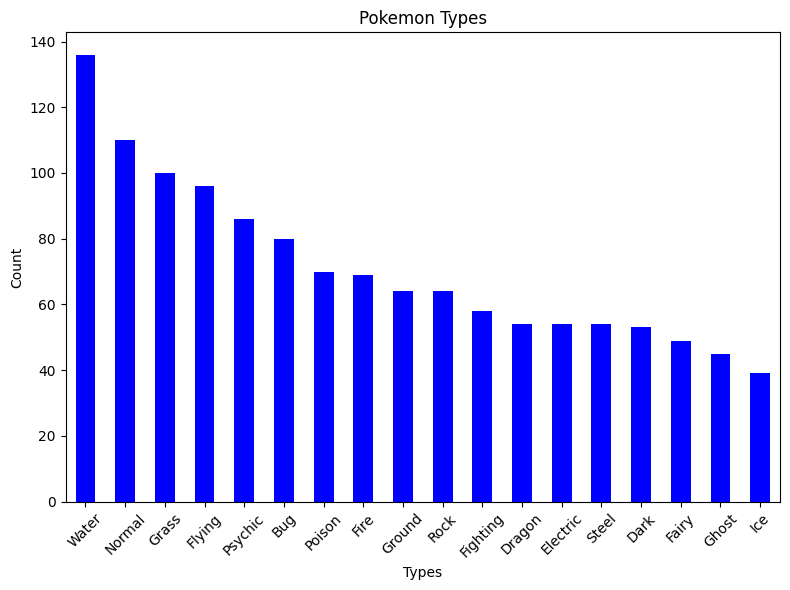

In [ ]:
# count plot of Pokemon Types
plt.figure(figsize=(8, 6))
df_types_exploded['type'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Pokemon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# exploding fast moves coulumn for better visualization
df_exploded_fastmoves = df_moves.explode('fast_moves')

# Taking Top 10 Most common Fast Moves
moves_counts = df_exploded_fastmoves['fast_moves'].value_counts()
top_10_moves_count = moves_counts.head(10)

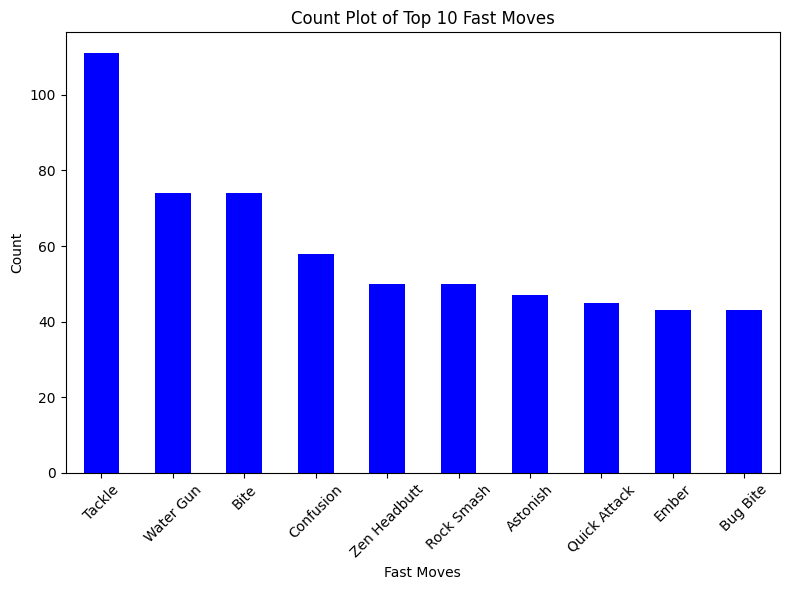

In [ ]:
# Count plot of types of Fast moves
plt.figure(figsize=(8, 6))
top_10_moves_count.plot(kind='bar', color='blue')
plt.xlabel('Fast Moves')
plt.ylabel('Count')
plt.title('Count Plot of Top 10 Fast Moves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# expolding chared moves column for better visualization
df_exploded_chargedmoves = df_moves.explode('charged_moves')

# Taking Top 10 Most common Charged Moves
charged_moves_counts = df_exploded_chargedmoves['charged_moves'].value_counts()
top_10_charged_moves_count = charged_moves_counts.head(10)

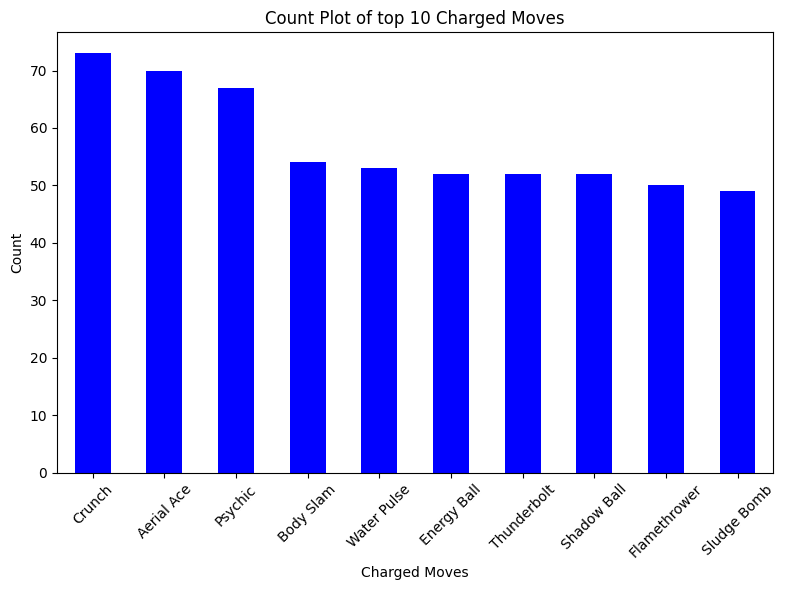

In [ ]:
# Count plot of most common charged moves
plt.figure(figsize=(8, 6))
top_10_charged_moves_count.plot(kind='bar', color='blue')
plt.xlabel('Charged Moves')
plt.ylabel('Count')
plt.title('Count Plot of top 10 Charged Moves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# top 5 attack pokemons
top_5_attack = df_stats.nlargest(5, ['base_attack'])

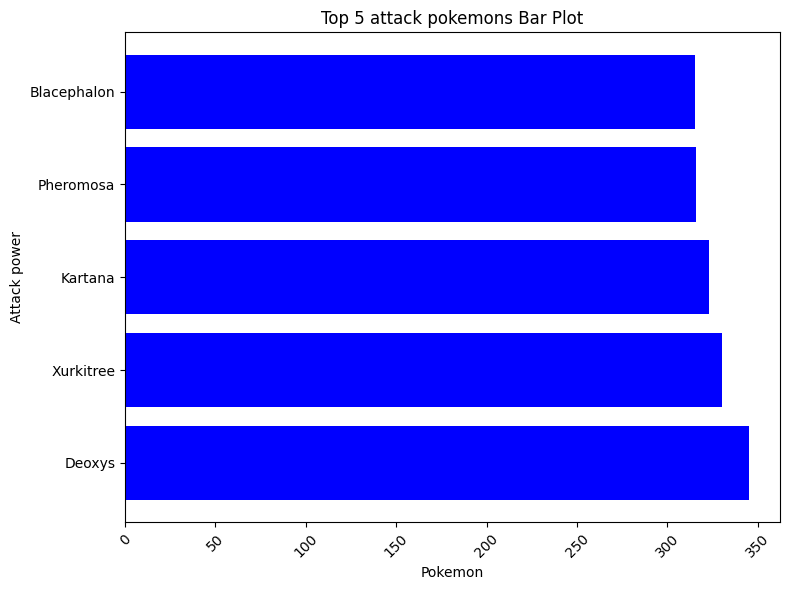

In [ ]:
# plotting the best attack type pokemons
plt.figure(figsize=(8, 6))
plt.barh(top_5_attack['pokemon_name'], top_5_attack['base_attack'], color='blue')
plt.xlabel('Pokemon')
plt.ylabel('Attack power')
plt.title('Top 5 attack pokemons Bar Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# top 5 defence pokemons
top_5_defense = df_stats.nlargest(5, ['base_defense'])

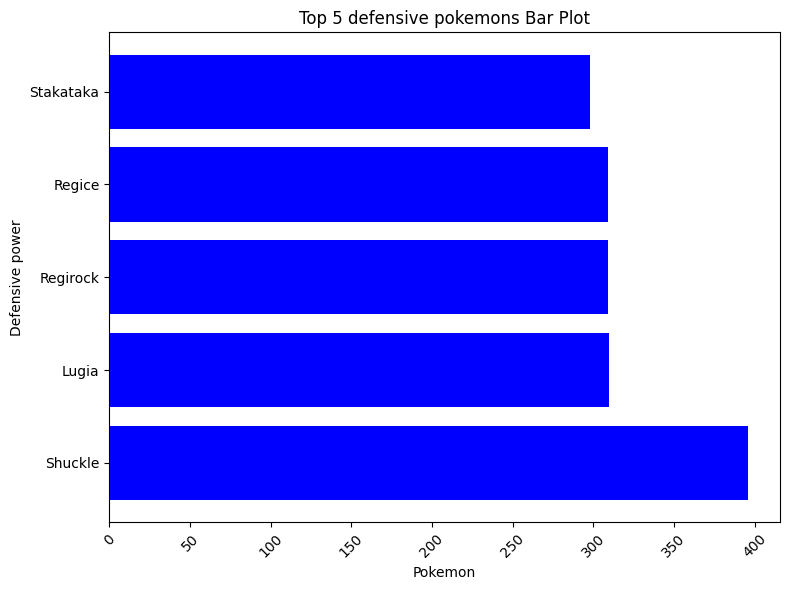

In [ ]:
# Ploting the best defence type pokemons
plt.figure(figsize=(8, 6))
plt.barh(top_5_defense['pokemon_name'], top_5_defense['base_defense'], color='blue')
plt.xlabel('Pokemon')
plt.ylabel('Defensive power')
plt.title('Top 5 defensive pokemons Bar Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# top 5 stamina pokemons
top_5_stamina = df_stats.nlargest(5, ['base_stamina'])

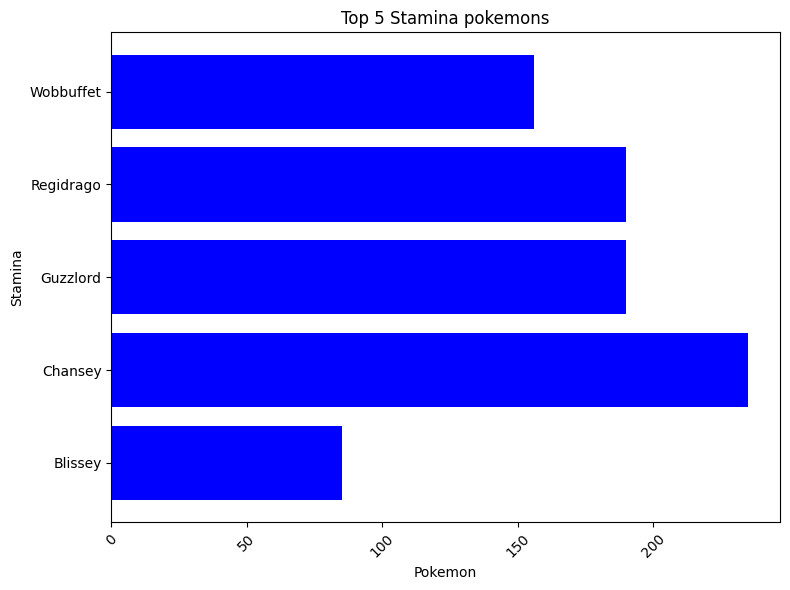

In [ ]:
# ploting the best stamina pokemons
plt.figure(figsize=(8, 6))
plt.barh(top_5_stamina['pokemon_name'], top_5_defense['base_stamina'], color='blue')
plt.xlabel('Pokemon')
plt.ylabel('Stamina')
plt.title('Top 5 Stamina pokemons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# importing rareness of pokemons API
url = "https://pokemon-go1.p.rapidapi.com/pokemon_rarity.json"

headers = {
	"X-RapidAPI-Key": "fdb593c968mshdfcf01d12f99976p14620ajsn75d2b69a2482",
	"X-RapidAPI-Host": "pokemon-go1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

rareness_data = response.text

In [ ]:
# converting json data to dictionary
df6 = pd.read_json(rareness_data, 'Legendary','Mythic','Standard','Ultra beast')

<ipython-input-33-87f63bc11a96>:2: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  df6 = pd.read_json(rareness_data, 'Legendary','Mythic','Standard','Ultra beast')


Since the Rareness data contain variable length lists, We have to export the contents one by one.

In [ ]:
# exporting legendary pokemons
df_legendary = pd.DataFrame(df6['Legendary'])
df_legendary.head()

,form,pokemon_id,pokemon_name,rarity
0,Galarian,144,Articuno,Legendary
1,Normal,144,Articuno,Legendary
2,Galarian,145,Zapdos,Legendary
3,Normal,145,Zapdos,Legendary
4,Galarian,146,Moltres,Legendary


In [ ]:
# exporting Mythic pokemons
df_Mythic = pd.DataFrame(df6['Mythic'])
df_Mythic.head()

,form,pokemon_id,pokemon_name,rarity
0,Normal,151,Mew,Mythic
1,Normal,251,Celebi,Mythic
2,Normal,385,Jirachi,Mythic
3,Attack,386,Deoxys,Mythic
4,Defense,386,Deoxys,Mythic


In [ ]:
# exporting Standard pokemons
df_Standard = pd.DataFrame(df6['Standard'])
df_Standard.head()

,form,pokemon_id,pokemon_name,rarity
0,Fall_2019,1,Bulbasaur,Standard
1,Normal,1,Bulbasaur,Standard
2,Normal,2,Ivysaur,Standard
3,Copy_2019,3,Venusaur,Standard
4,Normal,3,Venusaur,Standard


In [ ]:
# exporting Ultra pokemons
df_Ultra  = pd.DataFrame(df6['Ultra beast'])
df_Ultra.head()

,form,pokemon_id,pokemon_name,rarity
0,Normal,793,Nihilego,Ultra beast
1,Normal,794,Buzzwole,Ultra beast
2,Normal,795,Pheromosa,Ultra beast
3,Normal,796,Xurkitree,Ultra beast
4,Normal,797,Celesteela,Ultra beast


In [ ]:
# Combining all levels of Rarity of pokemons
df_rareness = pd.concat([df_legendary, df_Standard, df_Mythic, df_Ultra], ignore_index=True)
df_rareness.head()

,form,pokemon_id,pokemon_name,rarity
0,Galarian,144,Articuno,Legendary
1,Normal,144,Articuno,Legendary
2,Galarian,145,Zapdos,Legendary
3,Normal,145,Zapdos,Legendary
4,Galarian,146,Moltres,Legendary


In [ ]:
# taking only Normal form of Pokemons
df_rareness = df_rareness[(df_rareness.form=='Normal')]
df_rareness.head()

,form,pokemon_id,pokemon_name,rarity
1,Normal,144,Articuno,Legendary
3,Normal,145,Zapdos,Legendary
5,Normal,146,Moltres,Legendary
7,Normal,150,Mewtwo,Legendary
8,Normal,243,Raikou,Legendary


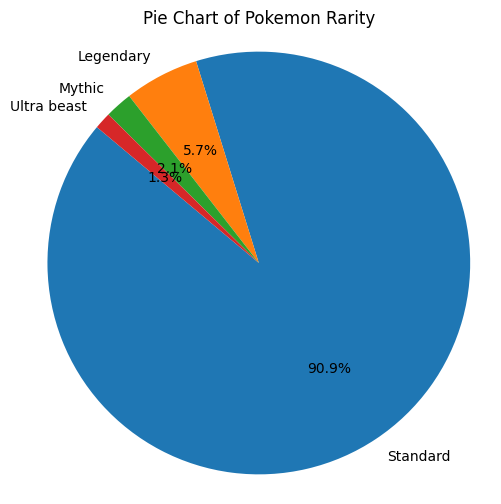

In [ ]:
# Taking Values of Rareness for Graph
value_counts_rareness = df_rareness['rarity'].value_counts()

# Ploting pie graph of Pokemon Rarity
plt.figure(figsize=(6, 6))
plt.pie(value_counts_rareness, labels=value_counts_rareness.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Pokemon Rarity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Machine Learning Model:**

In [ ]:
# Taking the Data For ML Classification Model
ml_data = pd.merge(df_stats, df_rareness, on='pokemon_id', how='inner')
ml_data

,base_attack,base_defense,base_stamina,form_x,pokemon_id,pokemon_name_x,form_y,pokemon_name_y,rarity
0,118,111,128,Normal,1,Bulbasaur,Normal,Bulbasaur,Standard
1,151,143,155,Normal,2,Ivysaur,Normal,Ivysaur,Standard
2,198,189,190,Normal,3,Venusaur,Normal,Venusaur,Standard
3,116,93,118,Normal,4,Charmander,Normal,Charmander,Standard
4,158,126,151,Normal,5,Charmeleon,Normal,Charmeleon,Standard
...,...,...,...,...,...,...,...,...,...
853,243,181,277,Normal,901,Ursaluna,Normal,Ursaluna,Standard
854,259,158,190,Normal,903,Sneasler,Normal,Sneasler,Standard
855,222,171,198,Normal,904,Overqwil,Normal,Overqwil,Standard
856,140,76,128,Normal,999,Gimmighoul,Normal,Gimmighoul,Standard


In [ ]:
# Droping Unessessary Columns
ml_data = ml_data.drop(columns=['form_y', 'pokemon_name_y'])

In [ ]:
ml_data.head()

,base_attack,base_defense,base_stamina,form_x,pokemon_id,pokemon_name_x,rarity
0,118,111,128,Normal,1,Bulbasaur,Standard
1,151,143,155,Normal,2,Ivysaur,Standard
2,198,189,190,Normal,3,Venusaur,Standard
3,116,93,118,Normal,4,Charmander,Standard
4,158,126,151,Normal,5,Charmeleon,Standard


In [ ]:
# machine learning model

In [ ]:
# Separate features and target
X = ml_data[['base_attack', 'base_defense', 'base_stamina']]
y = ml_data['rarity']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


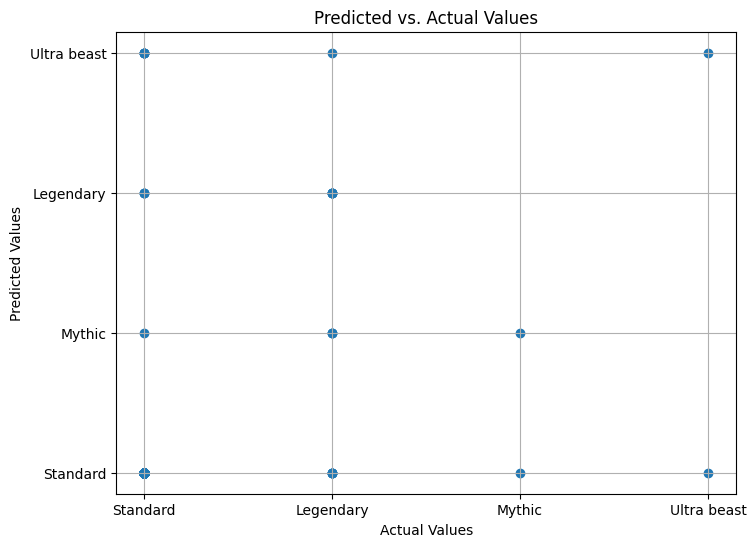

In [ ]:
# Create a scatter plot to visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.grid()
plt.show()